## Завдання 1
Розв'язати систему
$ 
\begin{cases}
\cos x + y = 1.5 \\
2x - \sin(y-0.5) = 1 \\
\end{cases}
$
методом простих ітерацій

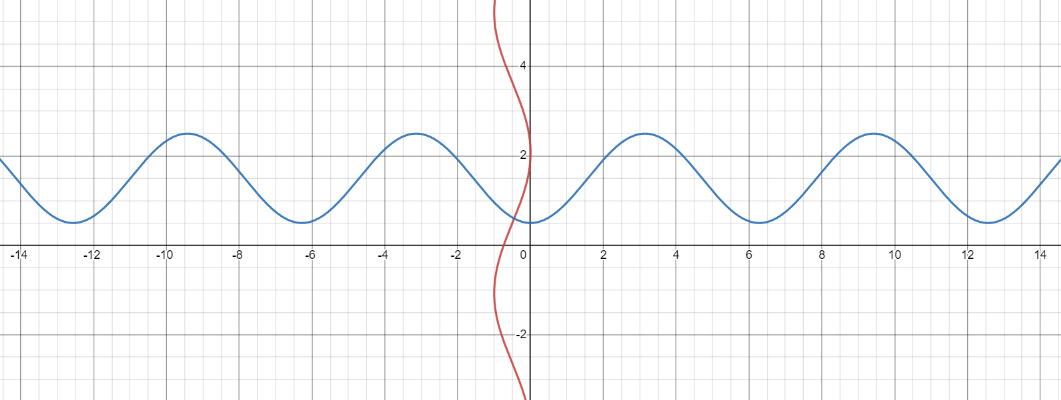

і трошки ближче:

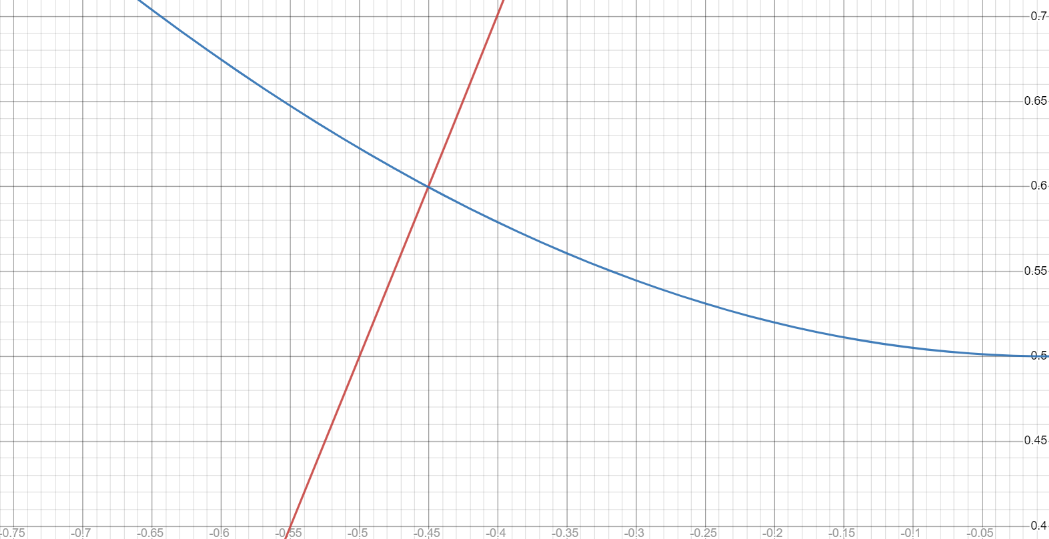

$x - \frac{1}{2} \sin(y-0.5) - \frac{1}{2} = 0\, - \text{позначено червоним}$

$y - 1.5 + \cos x = 0\, - \text{позначено синім}$

За початкве наближення візьмемо точку $\,x^{(0)} = (-0.4; 0.6)$

### Перевірити достатню умову збіжності

Покладемо $\varphi_1(x, y) = \frac{1}{2} \sin(y-0.5) + \frac{1}{2}; \,\, \varphi_2(x,y) = 1.5 - \cos x $ 

Достатня умова збіжності для метода простих ітерацій має вигляд: 

$$\max \limits_{x \in G} \max \limits_{i} \sum \limits_{j=1}^{n}\left| \frac{\partial \varphi_i(x)}{\partial x_j} \right| \leq q < 1$$

або

$$\max \limits_{x \in G} \max \limits_{j} \sum \limits_{i=1}^{n} \left| \frac{\partial \varphi_i(x)}{\partial x_j} \right| \leq q < 1$$

Будемо перевіряти першу умову. Виберемо такий окіл точки:

$$ x^{(0)}: G = \left\{(x, y): |x + 0.4| \leq 0.1; |y-0.6| \leq 0.1 \right\}$$

Знайдемо частинні похідні

$\cfrac{\partial \varphi_1}{\partial x} = \cfrac{\partial}{\partial x}\left(\cfrac{1}{2} \sin(y-0.5) + \cfrac{1}{2}\right) = 0$

$\cfrac{\partial \varphi_1}{\partial y} = \cfrac{\partial}{\partial y}\left(\cfrac{1}{2} \sin(y-0.5) + \cfrac{1}{2}\right) =\cfrac{1}{2} \cos(y-0.5)$

$\cfrac{\partial \varphi_2}{\partial x} = \cfrac{\partial}{\partial x}\left(1.5 - \cos x\right) =\sin x$

$\cfrac{\partial \varphi_2}{\partial y} = \cfrac{\partial}{\partial y}\left(1.5 - \cos x\right) = 0$

Оцінимо їх модулі в області $G$:

$\,\, \left|\cfrac{\partial \varphi_1}{\partial y} \right| = \cfrac{1}{2}\left|\cos(y-0.5)\right|$

Ця функція залежить лише від $y$. Побудуємо її графік на проміжку [0.5, 0.7], щоб побачити в якій точці функція набуває найбільшого значення

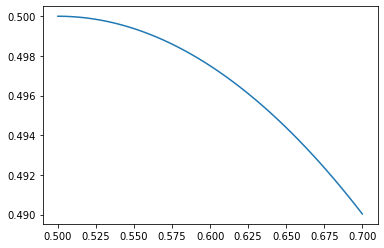

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_1(y):
    return (np.absolute(np.cos(y-0.5)))/2

fig = plt.subplots()
y = np.linspace(0.5,0.7,100)
plt.plot(y, f_1(y))

plt.show()

Отже, робимо висновок, що $\max \limits_{(x,y) \in G} \left| \cfrac{\partial \varphi_1}{\partial y}(x, y)\right| = 0.5$
, тому $\left|\cfrac{\partial \varphi_1}{\partial y} \right| \leq 0.5$

Аналогічно зробимо для $\left|\cfrac{\partial \varphi_2}{\partial x} \right| = |\sin x|$. Ця функція залежить лише від $x$, який в області $G$ лежить у проміжку $[-0.5, -0.3]$

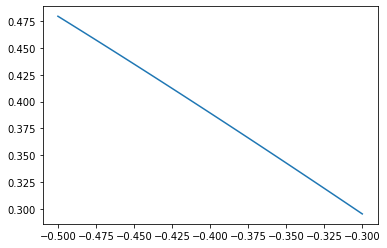

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f_2(x):
    return np.absolute(np.sin(x))

fig = plt.subplots()
x = np.linspace(-0.3,-0.5,100)
plt.plot(x, f_2(x))

plt.show()

Отже, максимального значення $\left|\cfrac{\partial \varphi_2}{\partial x} \right|$ приймає коли $x = -0.5$. Обчислимо це значення:

In [3]:
np.absolute(np.sin(-0.5))

0.479425538604203

Отримали, що $\max \limits_{(x,y) \in G} \left| \cfrac{\partial \varphi_2}{\partial x}(x, y)\right| = |\sin (-0.5)| < 0.5$

Тепер можна перевірити власне умову збіжності:
    
$\left|\cfrac{\partial \varphi_1}{\partial x}(x,y) \right| + \left|\cfrac{\partial \varphi_1}{\partial y}(x,y) \right| = 0.5 < 1$

$\left|\cfrac{\partial \varphi_2}{\partial x}(x,y) \right| + \left|\cfrac{\partial \varphi_2}{\partial y}(x,y) \right| = |\sin(-0.5)| < 0.5 < 1$

Отже, умова збіжності - виконується

### Реалізувати метод простих ітерацій. Розв'язати систему з точністю $\varepsilon = 10^{-5}$

In [4]:
import math

def delta(x_k, x_k_plus_1):
    return max(abs(x_k_plus_1[0]-x_k[0]), abs(x_k_plus_1[1]-x_k[1]))

def simple_iter(phi, x_0):
    
    x_1 = phi(x_0)
    data = np.vstack((np.array([[x_0[0], x_0[1]]]), np.array([[x_1[0], x_1[1]]])))
    deltas = np.vstack((np.array([[0]]), np.array([[delta(x_0, x_1)]])))
    
    
    while delta(x_0, x_1) > 0.00001:
        
        x_0 = x_1
        x_1 = phi(x_0)
        
        data = np.vstack((data, np.array([[x_1[0], x_1[1]]])))
        deltas = np.vstack((deltas, np.array([[delta(x_0,x_1)]])))
        
    iter_info = np.hstack((data, deltas))
    
    return x_1, iter_info

In [5]:
def phi(x):
    return ((1/2)*np.sin(x[1]-0.5) +(1/2), 1.5 - np.cos(x[0]))

x_0 = (-0.4, 0.6)
Result, iter_info = simple_iter(phi, x_0)

Result

(0.5819217672655836, 0.6645926439465167)

In [6]:
# подивимось скільки ітерацій було зроблено
iter_info.shape[0]

17

### Результати роботи програми оформити у вигляді таблиці.
Результати роботи програми записані в масив data. Перетворимо цей масив в об'єкт типу pandas.DataFrame,  щоб його можна було вивести у вигляді таблиці. Для цього створимо окрему функцію.

In [7]:
import pandas as pd

def to_df(array):
    
    #виведемо перші 15 ітерацій.
    array = array[:15]
    
    num = array.shape[0]
    df = pd.DataFrame(array, columns = [ 'x','y','delta'], index = np.arange(1,num+1))
    
    # це поле нічому не відповідає
    df['delta'][0] = None
    
    
    return df

In [8]:
to_df(iter_info)

,x,y,delta
1,-0.400000,0.600000,0.000000
2,0.549917,0.578939,0.949917
3,0.539429,0.647432,0.068493
4,0.573449,0.641998,0.034021
5,0.570760,0.659965,0.017968
6,0.579642,0.658510,0.008882
7,0.578923,0.663341,0.004832
8,0.581308,0.662948,0.002385
9,0.581114,0.664255,0.001307
10,0.581759,0.664148,0.000645


### Виконати перевірку, обчисливши $F(x\_^*)$

In [9]:
def F(x):
    return ((1/2)*np.sin(x[1]-0.5) +(1/2) - x[0], 1.5 - np.cos(x[0]) - x[1])

F(Result)

(3.4796770898015694e-06, -5.754404523994339e-07)

### Задати декілька інших початкових наближень (які не близькі до розв’язку) та з’ясувати як змінюється при цьому ітераційний процес, написати про це у висновку.

Візьмемо п'ять випадкових наближень і створимо табличку, щоб можна було побачити чи змінюється при цьому ітераційний процес.

In [10]:
# np.random.rand повертає матрицю заповнену випадковими числами в проміжку від 0 до 1. 
# Тому щоб отримати від'ємні числа, а також числа по модулю більші одиниці зробимо певні пертворення:

initial_approximations = (np.random.rand(5,2)-0.5)*100

new_data = np.zeros((5,5))

for i in range(5):
    
    new_data[i][0] = initial_approximations[i][0]
    new_data[i][1] = initial_approximations[i][1]
    
    result, info  = simple_iter(phi, initial_approximations[i])
    
    new_data[i][2] = info.shape[0]
    new_data[i][3] = result[0]
    new_data[i][4] = result[1]
    
pd.DataFrame(new_data, columns = [ 'x_0','y_0','iter', 'x', 'y'], index = np.arange(1,6))

,x_0,y_0,iter,x,y
1,43.433951,-36.773817,18.0,0.581930,0.664594
2,45.947261,-32.490885,22.0,0.581926,0.664597
3,3.709740,27.721308,21.0,0.581931,0.664597
4,-26.902689,-47.653148,21.0,0.581930,0.664596
5,-19.431070,-36.927644,17.0,0.581926,0.664598


Тут iter це кількість ітерацій, x_0, y_0 відповідно перша та друга координата початкового наближення, а x,y відповідно перша та друга координата розв'язку. Як бачимо точність майже не міняється, а кількість операцій хоч і збільшується, але не на багато.

### Знайти розв’язок системи за допомогою fsolve бібліотеки scipy.optimize

In [11]:
from scipy.optimize import fsolve

x_0 = (-0.4, 0.6)
print("розв'язок отриманий за допомогою fsolve:", tuple(fsolve(F, x_0)))
print("розв'язок отриманий за допомогою МПІ   :", Result)

розв'язок отриманий за допомогою fsolve: (0.5819261517549239, 0.6645944783630967)
розв'язок отриманий за допомогою МПІ   : (0.5819217672655836, 0.6645926439465167)


*МПІ - метод простих ітерацій

## Завдання 2
Розв'язати систему
$
\begin{cases}
\sin(x+y) -1.2x = 0.2 \\
x^2 + y^2 = 1
\end{cases}
$
методом Ньютона(або спрощеним методом Ньютона).

### Визначити початкове наближення, побудувавши графіки кривих системи

$$
\begin{cases}
\sin(x+y) -1.2x = 0.2 \\
x^2 + y^2 = 1
\end{cases}
\quad \Rightarrow{} \quad
\begin{cases}
\sin(x+y) -1.2x - 0.2 = 0\\
x^2 + y^2 - 1 = 0
\end{cases}
$$

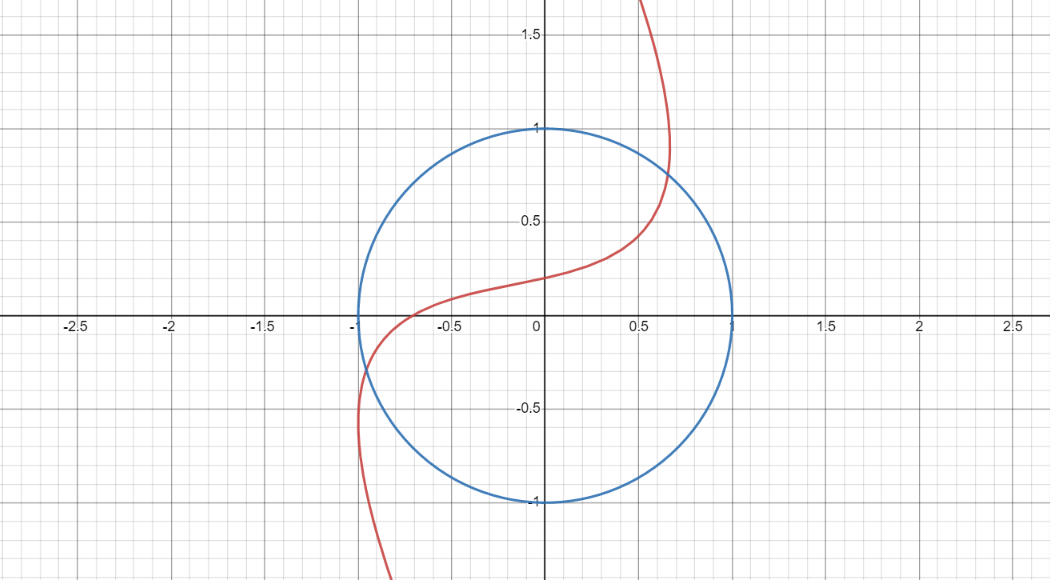

Будемо шукати корінь, що знаходиться в третьому квадранті. Для нього за початкове наближення візьмемо точку $x^{(0)} = (-1, -0.25)$ 

### Реалізувати метод Ньютона(або спрощений метод Ньютона)

Покладемо $f_1(x,y) = \sin(x+y) -1.2x - 0.2 ; \,\, f_2(x,y) = x^2 + y^2 - 1.$
Знайдемо матрицю Якобі вектор функції $\vec{F} = (f_1, f_2)^T$

$$
W(x,y) 
\,=\,
\begin{pmatrix}
\cfrac{\partial f_1}{\partial x} & \cfrac{\partial f_1}{\partial y} \\ 
\cfrac{\partial f_2}{\partial x} & \cfrac{\partial f_2}{\partial y}
\end{pmatrix}
\,=\, 
\begin{pmatrix}
\cfrac{\partial }{\partial x} \left(\sin(x+y) -1.2x - 0.2 \right) & \cfrac{\partial}{\partial y} \left(\sin(x+y) -1.2x - 0.2 \right) \\ 
\cfrac{\partial}{\partial x} \left(x^2 + y^2 - 1 \right) & \cfrac{\partial}{\partial y} \left(x^2 + y^2 - 1 \right)
\end{pmatrix}
\,=\,
\begin{pmatrix}
\cos(x+y) -1.2 & \cos(x+y) \\
2x & 2y
\end{pmatrix}
$$

$$$$
Створимо клас sympy_matrix. Це буде матриця елементами якої будуть функції створені за допомогою бібліотеки sympy.

In [12]:
class sympy_matrix:
    
    def __init__(self, dimentions, list_of_func):
        self.matrix = np.reshape(list_of_func,dimentions)
        self.dimentions = dimentions
    
    def calculate(self, vector, inversed = False):
        array = np.zeros(self.dimentions)
        
        for i in range(self.dimentions[0]):
            for j in range(self.dimentions[1]):
                
                array[i][j] = float(self.matrix[i][j].subs([(x, vector[0]), (y, vector[1])]))
            
        if inversed:
            return np.linalg.inv(array)
        
        return array
    
    

In [13]:
def newton_method(jakobi_matrix, F, x_0):
    
    x_0 = np.array([[x_0[0]], [x_0[1]]])
    vector = (x_0[0][0], x_0[1][0])
    x_1 = x_0 - np.matmul(jakobi_matrix.calculate(vector, inversed = True), F.calculate(vector))
    vector_1 = (x_1[0][0], x_1[1][0])
    data = np.vstack((np.array([[vector[0], vector[1]]]), np.array([[vector_1[0], vector_1[1]]])))
    deltas = np.vstack((np.array([[0]]), np.array([[delta(vector, vector_1)]])))
    
    while delta((x_0[0][0], x_0[1][0]),(x_1[0][0], x_1[1][0])) > 0.00001:
        
        x_0 = x_1
        vector = (x_0[0][0], x_0[1][0])
        x_1 = x_0 - np.matmul(jakobi_matrix.calculate(vector, inversed = True), F.calculate(vector))
        vector_1 = (x_1[0][0], x_1[1][0])
        data = np.vstack((data, np.array([[vector_1[0], vector_1[1]]])))
        deltas = np.vstack((deltas, np.array([[delta(vector,vector_1)]])))
        
    iter_info = np.hstack((data, deltas))
    
    return x_1, iter_info

In [14]:
from sympy import *

x, y = symbols('x y')

f_1 = sin(x+y) - 1.2*x - 0.2
f_2 = x*x + y*y - 1

partial_f_1_x = cos(x+y) -1.2
partial_f_1_y = cos(x+y)
partial_f_2_x = 2*x
partial_f_2_y = 2*y


jacobi_matrix = sympy_matrix((2,2), [partial_f_1_x,partial_f_1_y,partial_f_2_x,partial_f_2_y])
F = sympy_matrix((2,1), [f_1, f_2])
x_0 = (-1, -0.25)

RResult, new_data = newton_method(jacobi_matrix, F, x_0)

### Результати роботи програми оформити у звіті у вигляді таблиці.
Результати роботи програми записані в масив new_data. Перетворимо цей масив в об'єкт типу pandas.DataFrame,  щоб його можна було вивести у вигляді таблиці. Для цього вже була створена фунція to_df()

In [15]:
to_df(new_data)

,x,y,delta
1,-1.000000,-0.250000,0.000000
2,-0.957860,-0.293559,0.043559
3,-0.956832,-0.290659,0.002900
4,-0.956825,-0.290665,0.000006


### Виконати перевірку, обчисливши $F(x\_^*)$

In [16]:
F.calculate((RResult[0][0], RResult[1][0]))

array([[9.70445946e-13],
       [6.75174361e-11]])

### Задати декілька інших початкових наближень (які не близькі до розв’язку) та з’ясувати як змінюється при цьому ітераційний процес, написати про це у висновку
Код аналогічний коду, який знаходиться у відповідному пункті попереднього завдання.

In [17]:
initial_approximations = (np.random.rand(5,2)-1)*100

new_data = np.zeros((5,5))

for i in range(5):
    
    new_data[i][0] = initial_approximations[i][0]
    new_data[i][1] = initial_approximations[i][1]
    
    result, info  = newton_method(jacobi_matrix, F, initial_approximations[i])
    
    new_data[i][2] = info.shape[0]
    new_data[i][3] = result[0][0]
    new_data[i][4] = result[1][0]
    
num = new_data.shape[0]
pd.DataFrame(new_data, columns = [ 'x_0','y_0','iter', 'x', 'y'], index = np.arange(1,num+1))

,x_0,y_0,iter,x,y
1,-74.053431,-72.250931,15.0,-0.956825,-0.290665
2,-64.849454,-37.929896,22.0,-0.956825,-0.290665
3,-80.771546,-8.069930,16.0,-0.956825,-0.290665
4,-30.796225,-72.706812,22.0,-0.956825,-0.290665
5,-37.935344,-94.348261,35.0,-0.956825,-0.290665


Як бачимо, при певних значеннях початкового наближення кількість ітерацій сильно збільшується. При деяких значеннях початкового наближення наш метод знаходить другий корінь рівняння, але це не протирічить минулому факту.

### Знайти розв’язок системи за допомогою fsolve бібліотеки scipy.optimize



In [18]:
def Func(x):
    return (np.sin(x[0]+x[1]) -1.2*x[0] - 0.2, x[0]**2 + x[1]**2 - 1)

x_0 = (-1, -0.25)
print("розв'язок отриманий за допомогою fsolve:", tuple(fsolve(Func, x_0)))
print("розв'язок отриманий за допомогою МН    :", (RResult[0][0], RResult[1][0]))

розв'язок отриманий за допомогою fsolve: (-0.9568250258901118, -0.29066453142845994)
розв'язок отриманий за допомогою МН    : (-0.9568250259097143, -0.29066453147983495)


*МН - метод Ньютона

## Висновок.

Під час виконання цієї лабораторної роботи були розглянуті два методи пошуку коренів системи нелінійних рівнянь, а саме метод простих ітерацій і метод Ньютона. Було показано, що в випадку, коли початкове наближення не є близьким до розв'язку у методі простих ітерацій кількість ітерацій збальшується, але не сильно, а от у методі Ньютона значно збільшується. 